# DATA analysis

## used promoters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
promoters_df = pd.read_csv('../data/raw/promoters.csv')
promoters_df


,no_by_pos,position,name,number,sequence_5_to_3,no_name,id,sys_name,length,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,1,1,pCYC1,1,NaN,1_pCYC1,1_pCYC1_1,YJR048W,NaN,2775.830,3742.74000,2459.6600
1,2,1,pENO2,2,NaN,2_pENO2,2_pENO2_2,YHR174W,NaN,2950.220,2527.27000,84.3614
2,3,1,pPCK1,3,NaN,3_pPCK1,3_pPCK1_3,YKR097W,NaN,1948.900,9.80902,4639.4100
3,4,1,pRPL15B,4,NaN,4_pRPL15B,4_pRPL15B_4,YMR121C,NaN,200.212,186.50900,258.0280
4,1,2,pCCW12,5,NaN,5_pCCW12,5_pCCW12_1,YLR110C,NaN,5496.460,6376.54000,2516.0500
5,2,2,pMLS1,6,NaN,6_pMLS1,6_pMLS1_2,YNL117W,NaN,2222.160,8.09464,5267.0000
6,3,2,pTPI1,7,NaN,7_pTPI1,7_pTPI1_3,YDR050C,NaN,2264.780,2853.86000,209.1640
7,4,2,pURE2,8,NaN,8_pURE2,8_pURE2_4,YNL229C,NaN,253.590,344.07600,222.4390


In [3]:
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df

,name,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [4]:
promoters_df.columns = ['name', 6, 12, 24]
promoters_df

,name,6,12,24
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [5]:
promoters_df = promoters_df.set_index('name')


In [6]:
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


In [7]:
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


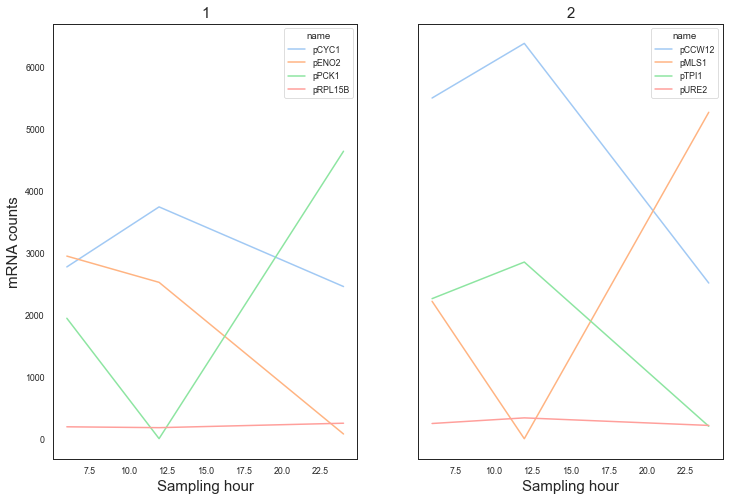

In [8]:
# Plotting an empty subplot

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)
#plt.savefig('Pictures/Dynamics_of_chosen_promoters.png', dpi = 120)

## DATA wrangling

In [9]:
#1. In Emacs; Result_table_210330_tmet494_Soren.xlsx to .csv N.D. -> N.A.; N.A. -> NA.
#2. Change names to plates names e.g.Result_table_210330_tmet494_Soren.csv -> Result_table_210330_tmet494_yp48Feed-Nofeed.xlsx


In [10]:
#your_df = pd.read_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren.csv',sep=';',decimal=',')
#your_df.to_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv')

In [11]:
import pandas as pd
import glob
import os

results1 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv", sep = ',')
#results2 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
#results_merged = pd.concat([results1, results2], ignore_index=True)
results_merged = results1
results_merged

,Unnamed: 0,data_file,sample_notes,AC Samples,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tetrahydroalstonine,Amt_ug_L_Tryptamine,Amt_ug_L_Tryptophan,Unnamed: 10,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,Amt_uM_Tryptophan
0,0,210330_TMET494_032.xms,96WP988_P1_B2,0_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,8009.517,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,49.99074398,N.A.
1,1,210330_TMET494_033.xms,96WP988_P1_B3,0_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,5817.125,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,36.30710898,N.A.
2,2,210330_TMET494_034.xms,96WP988_P1_B4,0_3_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6003.777,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,37.47208214,N.A.
3,3,210330_TMET494_035.xms,96WP988_P1_B5,1_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6635.864,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,41.41720135,N.A.
4,4,210330_TMET494_036.xms,96WP988_P1_B6,1_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,7046.096,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,43.97763076,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,210330_TMET494_237.xms,96WP989_P2_F11,17_2_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,79827.258,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,498.235289,N.A.
104,104,210330_TMET494_241.xms,96WP989_P2_G2,17_3_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,97553.734,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,608.8736363,N.A.
105,105,210330_TMET494_246.xms,96WP989_P2_G7,15_4_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,623.513,N.D.,113480.148,N.A.,NaN,N.D.,N.D.,N.D.,1.175175754,N.D.,708.2770441,N.A.
106,106,210330_TMET494_247.xms,96WP989_P2_G8,15_5_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,576.808,N.D.,122431.367,N.A.,NaN,N.D.,N.D.,N.D.,1.087147784,N.D.,764.1453439,N.A.


In [12]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results_merged.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)


# replacing N.D and N.A. with NA
#df_filter = df_filter.replace('N.D.', 'NA')
#df_filter = df_filter.replace('N.A.', 'NA')


# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 3:11], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 0:1], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 2:3], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, -1:], inplace = True, axis = 1)

# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

In [13]:
#"df_filter.to_csv('../data/raw/023_LC-MS/all_results_lcms/Result_table_210330_tmet494_Lucas.csv')

In [14]:
# seperate sample notes into different plates ie. P1, P2, P3: A1, A2... 
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'plate', 'well']
df_filter_plates.iloc[108:, 2:3] = df_filter_plates.iloc[108:, 1:2]
df_filter_plates.iloc[108:, 1:2] = 'P3'

list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

In [15]:
#df_filter[['sample', 'plate', 'well']] = pd.DataFrame([df_filter_plates['sample'], df_filter_plates['plate'], df_filter_plates['well'] ])
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2
concatenated = concatenated.fillna(0.0)

#### adding media rows to the AC_sample column

In [16]:

for index, row in concatenated.iterrows():
    if row['plate'] == 'P1':
        concatenated.iloc[index, 9:10] = 'yp48' 
        
    if row['plate'] == 'P2':
        concatenated.iloc[index, 9:10] = 'yp49' 
        
    if row['plate'] == 'P3':
        concatenated.iloc[index, 9:10] = 'yp50'
    
    if row['plate'] == 'P4':
        concatenated.iloc[index, 9:10] = 'yp51'
    if row['plate'] == 'P5':
        concatenated.iloc[index, 9:10] = 'yp52'
                
    
    # Addding zero betwieen letter and well value. 
    if len(row['well']) == 2:
        listed = list(row['well'])
        with_0 = str(listed[0])+str(0)+ str(listed[1])
        concatenated.iloc[index, 10:11] = with_0
         
Processed_file = concatenated.fillna(0)
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


## Merge Plate design yp48-52 metadata into single csv file


In [17]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls')

# reading the different sheets
df1 = pd.read_excel(xls, 'MIA-HA-1-17_yp48')  # plate 48
df1["plate"] = 'yp48' 

df2 = pd.read_excel(xls, 'MIA-HA-51-80_yp49') # plate 49
df2["plate"] = 'yp49' 

df3 = pd.read_excel(xls, 'MIA-HA-21-50_yp50') # plate 50
df3["plate"] = 'yp50' 

df4 = pd.read_excel(xls, 'MIA-HA-81-100_yp51')# plate 51
df4["plate"] = 'yp51' 

df5 = pd.read_excel(xls, 'yp52-HA-71-72')     # plate 52
df5["plate"] = 'yp52' 


In [18]:
results_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [19]:
results_merged

,position,Sample name,Cellular Compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,genotype,plate,Cellular compartment
0,A01,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
1,A02,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
2,A03,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
3,A04,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
4,A05,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
572,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
573,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
574,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN


In [20]:
results_merged.to_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv', header = True, index = False)

In [21]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv') 

In [22]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [23]:
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


In [24]:
# Merge our lcms file with the genotype/strain 
merged_inner = pd.merge(Processed_file, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD
1,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD
3,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04,MIA-HA-2,3.0,pCYC1_pURE2,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
158,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02,MIA-HA-75,2.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
159,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07,MIA-HA-77,1.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
160,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08,MIA-HA-77,2.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


It seems like we have some duplicates. We can easily get rid of them in the following way:

In [25]:
final_processed_data = merged_inner.drop_duplicates(ignore_index = True, subset=['data_file'])
len(final_processed_data)

108

## YP48 (Cro strains)

\*\*\* Experiment 1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding. We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when feed

Strains\
1. YP48

Media feed: 0.2 mM geraniol & 1 mM tryptamine 1. YP + 2 % glucose 2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 2. (Friday 26): Inoculate maincultures. Transfer 10 of preculture to 500 media 1 and media 2 3. (Monday 8): For each media, one at a time: 1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) 2. Transfer 200 into new 96 well plate, 3. Add 20 uL 10 mg/L caffeine stock 4. Add X ul Std_MM_v13 standards 5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 6. Measure MIAs (extracellular loganin) 4. (TBD): Khem run plate 5. (TBD): Data analysis

\*\*\*\* Analytics notes: Notes from Khem: N:D.: not detected or below quantification limits; N.A.: not analyzed; Loganin, strictosidine and tryptamine are quantifiable and others are not quantifiable. Some samples might have been not integrated because of low abundance of the peak


In [26]:
# we have to make all the values into floats in order to sort them later
final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_5722/2972764381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


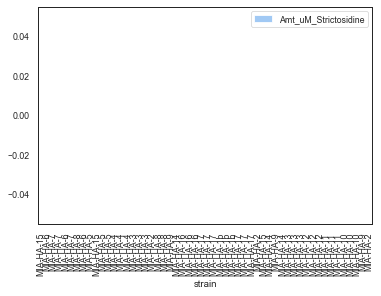

In [27]:
sorted_df = final_processed_data.sort_values(by='Amt_uM_Strictosidine', ascending=False)
yp48 = sorted_df.loc[sorted_df['plate'] == 'yp48']
yp48.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
None

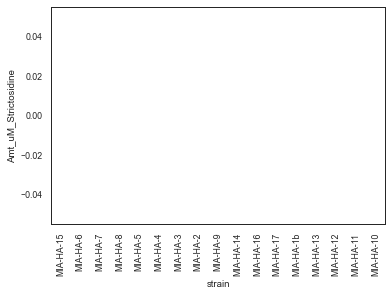

In [28]:
histogram = sns.barplot(data=yp48, x = 'strain', y = 'Amt_uM_Strictosidine')
#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

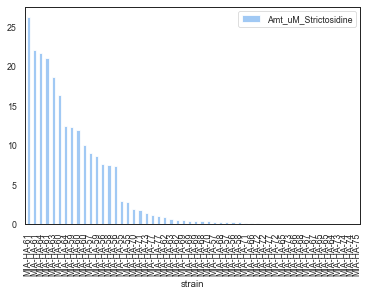

In [29]:
yp49 = sorted_df.loc[sorted_df['plate'] == 'yp49']
yp49.plot.bar(x = 'strain', y = 'Amt_uM_Strictosidine')
#yp49.head(50)
None

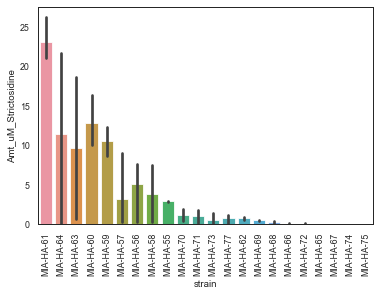

In [30]:
histogram = sns.barplot(data=yp49, x = 'strain', y = 'Amt_uM_Strictosidine')
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
None

## Conclusion 
1. Bg strain mutated & lost genes 
2. Promoters course large variation - continously low (pRPL15b) doesn't work well for G8H but does for alright for CPR (pURE) 
3. Has strain lost tryptamine synthase or geraniol synthesis genes?


Now doing the same with the other data 

## YP49-51 (library strains)

\*\*\* Experiment:

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

\*\*\*\* Analytics notes:

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

In [84]:
# Lets read in all the plates

plate49 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
plate50 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')
plate51 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp51.csv", sep = ',')
rerun = pd.read_csv("../data/raw/023_LC-MS/Result_table_210608_tmet525_reyp50-51.csv", sep = ',')
plate52 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210621_tmet531_soren.csv", sep = ',')

# rerun has two columns that are controls that we dont need
rerun = rerun.iloc[2:]


# Stack the DataFrames on top of each other - Lets add the plate 49 from before
results2 = pd.concat([ plate49, rerun,plate50, plate51 ], axis=0)


In [95]:
results2

,data_file,sample_notes,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Unnamed: 7,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210519_TMET517_018.xms,96WP1056_A01,NaN,NaN,NaN,143.890,146892.391,NaN,NaN,NaN,NaN,0.271199,916.816821
1,210519_TMET517_019.xms,96WP1056_A02,NaN,NaN,NaN,39.852,160741.781,NaN,NaN,NaN,NaN,0.075112,1003.256653
2,210519_TMET517_020.xms,96WP1056_A03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210519_TMET517_021.xms,96WP1056_A04,NaN,NaN,NaN,29.985,135912.563,NaN,NaN,NaN,NaN,0.056515,848.287124
4,210519_TMET517_022.xms,96WP1056_A05,NaN,NaN,NaN,NaN,127009.570,NaN,NaN,NaN,NaN,NaN,792.719823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,NaN,716.115,NaN,15859.590,180041.953,NaN,NaN,1.834405,NaN,29.891607,1123.717095
62,210603_TMET525_261.xms,96WPYP51_H9,NaN,606.494,NaN,14590.223,151496.813,NaN,NaN,1.553599,NaN,27.499148,945.554943
63,210603_TMET525_262.xms,96WPYP51_H10,NaN,NaN,NaN,23690.100,193096.094,NaN,NaN,NaN,NaN,44.650282,1205.193447
64,210603_TMET525_263.xms,96WPYP51_H11,NaN,15248.204,NaN,74476.773,343782.531,NaN,NaN,39.059901,NaN,140.371248,2145.690494


 We filter for rows that has at least one of these compounds: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'

In [96]:

# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results2.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')
print(len(df_filter))
# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:8], inplace = True, axis = 1)
df_filter
# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

# split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

# Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

# FIX THIS
#oncatenated.insert(loc=8, column='plate', value = 'x')

#df_filter_plates 
concatenated = concatenated.fillna(0)

253


In [86]:
# fixing the data 
for index, row in concatenated.iterrows():
    if len(row['well']) == 2: 
        letter, number = row['well'][0:1], row['well'][1:2]
        #print(letter, number)
        row['well'] = letter + '0' + number
    

In [87]:
# copying sample to plate
results_copy = concatenated.copy()
results_copy['plate'] = results_copy['sample']
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01,96WP1056
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02,96WP1056
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04,96WP1056
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05,96WP1056
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06,96WP1056
...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H8,96WPYP51
62,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H9,96WPYP51
63,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10,96WPYP51
64,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,96WPYP51


In [89]:
bool_series = results_copy.duplicated()
bool_series

0     False
1     False
3     False
4     False
5     False
      ...  
61    False
62    False
63    False
64    False
65    False
Length: 253, dtype: bool

In [97]:
'''yp49 = yp49[['data_file','sample_notes','Amt_uM_Loganic acid',
             'Amt_uM_Loganin','Amt_uM_Secologanin','Amt_uM_Strictosidine',
             'Amt_uM_Tryptamine','sample','well','plate']]

'''

"yp49 = yp49[['data_file','sample_notes','Amt_uM_Loganic acid',\n             'Amt_uM_Loganin','Amt_uM_Secologanin','Amt_uM_Strictosidine',\n             'Amt_uM_Tryptamine','sample','well','plate']]\n\n"

In [98]:
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49
...,...,...,...,...,...,...,...,...,...,...
78,210330_TMET494_193.xms,96WP989_P2_D6,0.0,0.0,0.0,0.000000,510.6537136,96WP989,D06,yp49
99,210330_TMET494_233.xms,96WP989_P2_F7,0.0,0.0,0.0,0.000000,516.0732118,96WP989,F07,yp49
102,210330_TMET494_236.xms,96WP989_P2_F10,0.0,0.0,0.0,0.000000,577.9672076,96WP989,F10,yp49
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.000000,498.235289,96WP989,F11,yp49


getting the right plate name

In [100]:
results_copy.loc[results_copy['plate'] == '96WP1056', 'plate'] = 'yp49'
results_copy.loc[results_copy['plate'] == '96WPYP50', 'plate'] = 'yp50'
results_copy.loc[results_copy['plate'] == '96WPYP51', 'plate'] = 'yp51'
results_copy.loc[results_copy['plate'] == '96WPYP52', 'plate'] = 'yp52'

# for standardization
results_copy.loc[results_copy['plate'] == '96WPYP49', 'plate'] = 'yp49'

# adding plate 49 
results_copy = pd.concat([results_copy, yp49])
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49
...,...,...,...,...,...,...,...,...,...,...
78,210330_TMET494_193.xms,96WP989_P2_D6,0.0,0.0,0.0,0.000000,510.6537136,96WP989,D06,yp49
99,210330_TMET494_233.xms,96WP989_P2_F7,0.0,0.0,0.0,0.000000,516.0732118,96WP989,F07,yp49
102,210330_TMET494_236.xms,96WP989_P2_F10,0.0,0.0,0.0,0.000000,577.9672076,96WP989,F10,yp49
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.000000,498.235289,96WP989,F11,yp49


In [101]:
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


# Why do we lose so many rows here????? - There should be 276 wells here. 

In [102]:
lcms_platedesign = pd.merge(results_copy, PlateDesign, on=['plate','well'])
lcms_platedesign

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.0,0.0,0.271199,916.816821,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.0,0.0,0.075112,1003.256653,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.0,0.0,0.056515,848.287124,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.0,0.0,0.000000,792.719823,96WP1056,A05,yp49,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.0,0.0,0.315968,1061.010835,96WP1056,A06,yp49,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,210603_TMET525_224.xms,96WPYP51_E11,0.0,0.0,0.0,0.000000,1567.396099,96WPYP51,E11,yp51,MIA-HA-100,2.0,CcalG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
293,210603_TMET525_225.xms,96WPYP51_E12,0.0,0.0,0.0,0.153556,1103.389383,96WPYP51,E12,yp51,MIA-HA-100,3.0,CcalG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
294,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.0,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
295,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


In [40]:

#pd.set_option('display.max_rows', 1000)


In [104]:
# Merge our lcms file with the genotype/strain - THis is based on which plate it is and which well
#merged_inner1 = pd.merge(results_copy, PlateDesign, on=['plate','well'])
#merged_inner1

Lets normalize the strictosidine productions


In [108]:
control_strict_df = merged_inner1.loc[merged_inner1['strain'] == 'MIA-CH-A2']
df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
control_strict_df

# the mean from the MIA-CH-A2 strain is ~ 32

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
250,210519_TMET517_128.xms,96WP1056_H07,0.0,5.985699,0.0,31.937737,923.984696,96WP1056,H07,yp49,MIA-CH-A2,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
251,210519_TMET517_129.xms,96WP1056_H08,0.0,5.871533,0.0,34.732222,785.546143,96WP1056,H08,yp49,MIA-CH-A2,2.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
252,210519_TMET517_130.xms,96WP1056_H09,0.0,2.170552,0.0,23.996807,604.312676,96WP1056,H09,yp49,MIA-CH-A2,3.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
253,210519_TMET517_131.xms,96WP1056_H10,0.0,4.437494,0.0,26.888967,706.408276,96WP1056,H10,yp49,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
278,210603_TMET525_131.xms,96WPYP50_H10,0.0,3.289702,0.0,34.226089,1249.009568,96WPYP50,H10,yp50,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
294,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.0,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


In [107]:
norm_strict_df = merged_inner1.copy()
norm_strict_df['norm_strict_%'] = 0

In [109]:
for index, row in norm_strict_df.iterrows():
    #normalized = round(((row['Amt_uM_Strictosidine']/df_mean)*100),3)
    normalized = ((row['Amt_uM_Strictosidine']/df_mean)*100)

    norm_strict_df.at[index, 'norm_strict_%'] = normalized

In [111]:
# we have to make all the values into floats in order to sort them 
#merged_inner1['Amt_uM_Strictosidine'] = pd.to_numeric(merged_inner1['Amt_uM_Strictosidine'], downcast='float')
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()


# Lets remove Mia-CM3 - the control
#sorted_df = sorted_df[sorted_df['strain'] != 'MIA-CM-3' ]
sorted_df_lcms = sorted_df #[sorted_df['strain'] != 'MIA-CH-A2' ]

sorted_df_lcms

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,295,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,428.763
1,279,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,H11,yp50,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,216.577
2,294,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.0,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,136.384
3,254,210519_TMET517_132.xms,96WP1056_H11,0.0,13.840299,0.0,41.660256,623.483435,96WP1056,H11,yp49,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,127.251
4,187,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,118.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,139,210330_TMET494_215.xms,96WP989_P2_E2,0.0,0.0,0.0,0.000000,589.4807702,96WP989,E02,yp49,MIA-HA-67,2.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
293,138,210330_TMET494_215.xms,96WP989_P2_E2,0.0,0.0,0.0,0.000000,589.4807702,96WP989,E02,yp49,MIA-HA-67,2.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
294,135,210519_TMET517_068.xms,96WP1056_D12,0.0,0.0,0.0,0.000000,619.353271,96WP1056,D12,yp49,MIA-HA-66,3.0,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
295,134,210330_TMET494_198.xms,96WP989_P2_D11,0.0,0.0,0.0,0.000000,647.3738235,96WP989,D11,yp49,MIA-HA-66,2.0,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000


In [112]:
'''mean_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].mean()
std_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].std()
mean_df.columns = ('mean_strictosidine', 'mean_normalized_strict')
std_df.columns = ('std_strictosidine', 'std_normalized_strict')
std_mean_df = pd.merge(mean_df, std_df, left_index=True, right_index=True)
std_mean_df.reset_index(inplace=True)

std_mean_df = pd.merge(sorted_df, std_mean_df, left_index=True, right_index=True)
std_mean_df'''

"mean_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].mean()\nstd_df = sorted_df.groupby('genotype')[['Amt_uM_Strictosidine', 'norm_strict_%']].std()\nmean_df.columns = ('mean_strictosidine', 'mean_normalized_strict')\nstd_df.columns = ('std_strictosidine', 'std_normalized_strict')\nstd_mean_df = pd.merge(mean_df, std_df, left_index=True, right_index=True)\nstd_mean_df.reset_index(inplace=True)\n\nstd_mean_df = pd.merge(sorted_df, std_mean_df, left_index=True, right_index=True)\nstd_mean_df"

In [113]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


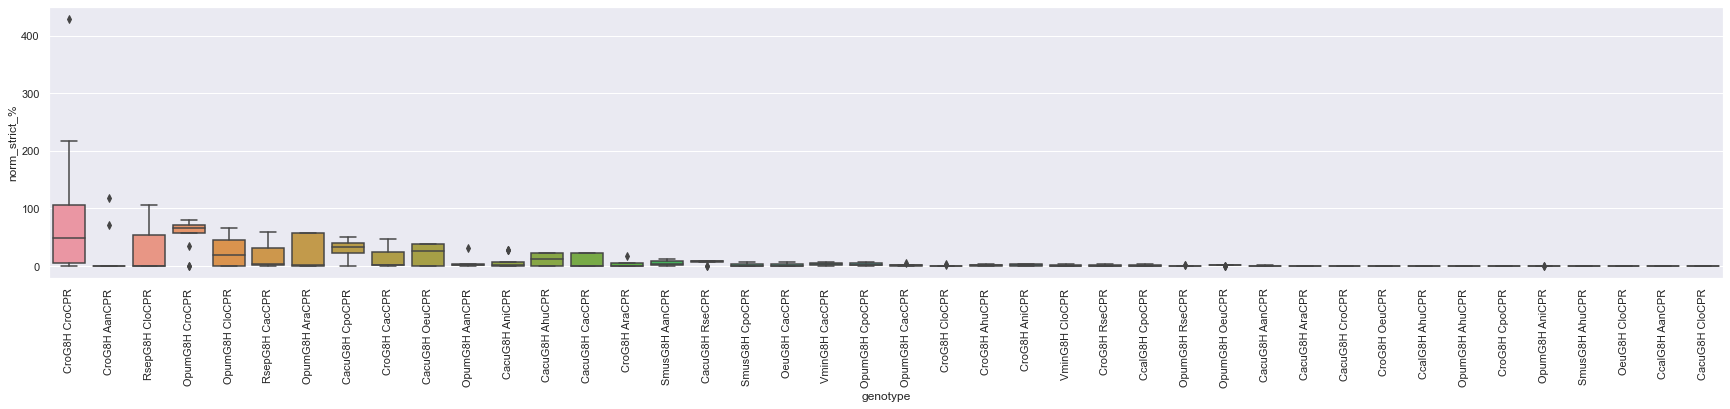

In [114]:
box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df_lcms)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

This plot will take the same genotypes and make error bars. we are not interested in that. see below instesad. 

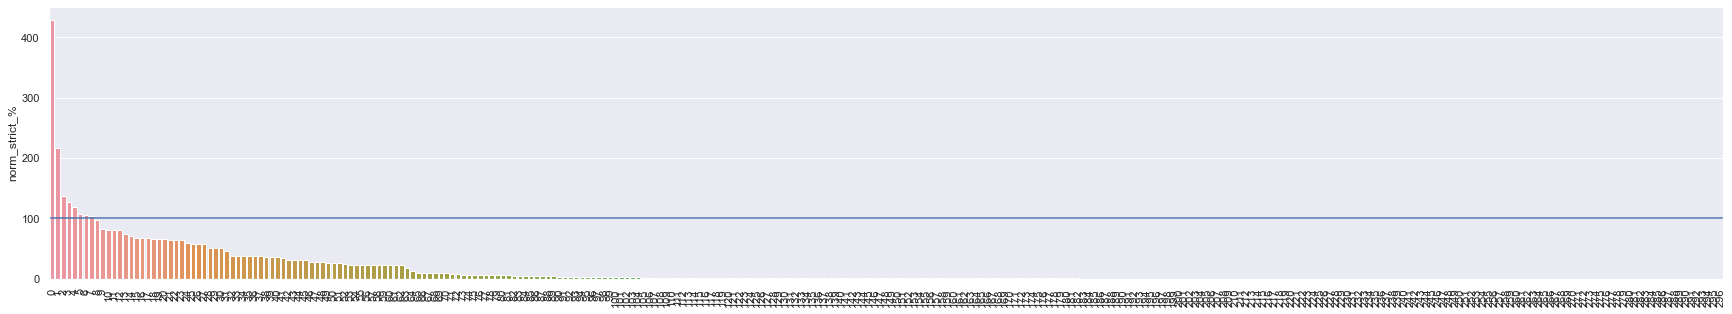

In [115]:
histogram = sns.barplot(data=sorted_df_lcms, x=sorted_df_lcms.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

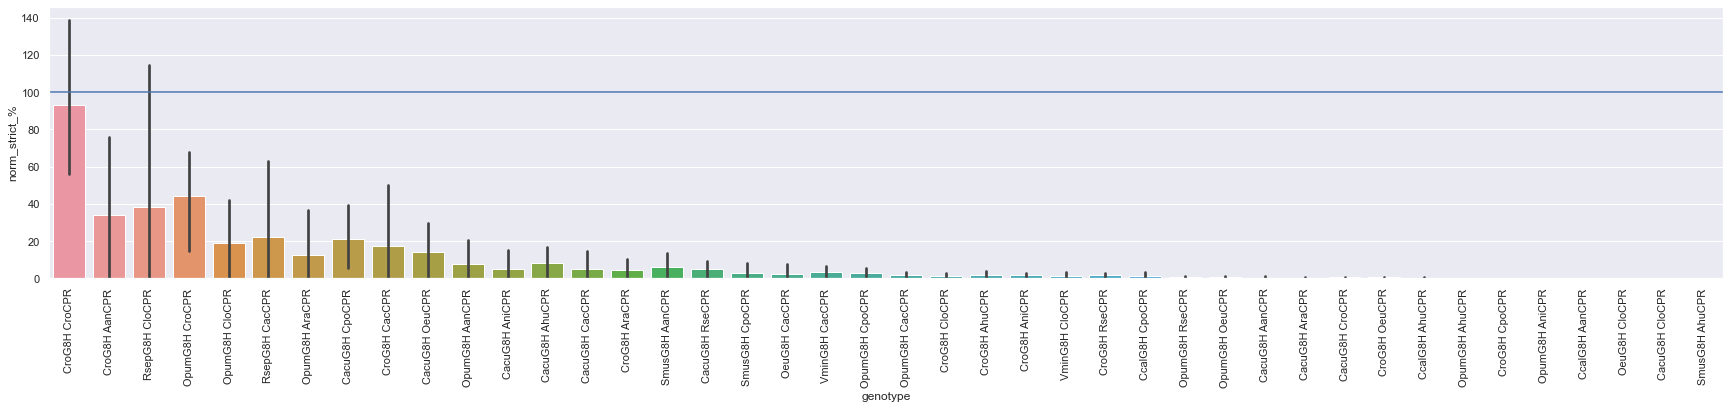

In [50]:
histogram = sns.barplot(data=sorted_df_lcms, x='genotype', y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

# Genotyping

In [116]:
path = '../data/raw/10_Sanger_results/'
files = os.listdir(path)
files

['PlateReport_yp51_cpr.xls',
 'PlateReport_yp49_cpr.xls',
 'PlateReport_yp50_cpr.xls',
 'PlateReport_yp51_g8h.xls',
 'ab1',
 'PlateReport_yp50_g8h.xls',
 'PlateReport_yp49_g8h.xls',
 '.ipynb_checkpoints',
 'sanger_fasta']

In [117]:
yp49_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_cpr.xls')
yp49_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_g8h.xls')
yp50_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_cpr.xls')
yp50_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_g8h.xls')
yp51_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_cpr.xls')
yp51_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_g8h.xls')

# list of all the dataframes
sequencing_plates = [yp49_cpr, yp49_g8h, yp50_cpr, yp50_g8h, yp51_cpr, yp51_g8h]

In [118]:
yp49_cpr.head(20)

,Plate: yp49_cpr,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,mean used length: 599 n,NaN,NaN,NaN,NaN,NaN,NaN
1,"used length < 100 n: 33 (34,74%)",NaN,NaN,NaN,NaN,NaN,NaN
2,"used length > 100 < 500 n: 4 (4,21%)",NaN,NaN,NaN,NaN,NaN,NaN
3,"used length > 500 n: 58 (61,05%)",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7,593,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115,144,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6,591,584


In [119]:
def slicing_and_naming_seq_plates(sequencing_plates, where_to_slice = 7) -> list: 

    # changing column names and slicing
    for i in range(len(sequencing_plates)): 
        sequencing_plates[i].columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used")#sequencing_plates[0].iloc[6]
        sequencing_plates[i] = sequencing_plates[i][where_to_slice:]
        
    return sequencing_plates


In [120]:
# making all values floats

def plat_seq_data_wrangler(sequencing_plates) -> list:

    list_with_dfs =[]
    
    for i in range(len(sequencing_plates)):
        # taking only a subset of the dataframe:
        numeric_values = sequencing_plates[i][["AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used"]]

        # if values are non nummeric make them NaN
        numeric_values = numeric_values.replace('n.a.', np.NaN)

        # Making them numeric
        numeric_values = numeric_values.apply(pd.to_numeric, errors='coerce')

        # Adding names column
        name_column = sequencing_plates[i]["Sample-Name"]
        number_column = sequencing_plates[i]["Number"]
        
        # Adding them to the dataframe
        data1 = pd.concat([number_column, name_column,numeric_values], axis = 1)
        list_with_dfs.append(data1)

    return list_with_dfs

In [121]:
def plate_AvgQual(list_of_dfs_numeric, Avg_qual = 50, used_bases = 25 ) -> list:
    
    # Initialize
    filtered_plates = []

    for i in range(len(list_of_dfs_numeric)):
        # Filter 
        filter_Avg_qual = list_of_dfs_numeric[i][list_of_dfs_numeric[i]["AvgQual"] > Avg_qual ]
        filer_used_bases = filter_Avg_qual[filter_Avg_qual["used"] > used_bases ]
        # Save the filtered plates
        filtered_plates.append(filer_used_bases)
    
    return filtered_plates

In [122]:
def split_df_names(df_names_column, which_column_to_split1 = 0, which_column_to_split2 = 2 ) -> list: 
    
    df_with_names_split =[]
    
    for i in range(len(df_names_column)):
        # splitting
        df_filter_plates = df_names_column[i]['Sample-Name'].str.split('_', expand=True)
        
        # selecting
        column1 = df_filter_plates[which_column_to_split1]
        column2 = df_filter_plates[which_column_to_split2]
        #column3 = df_filter_plates[3:]

        
        # concating
        concatenated = pd.concat([df_names_column[i], column1, column2], axis=1, ignore_index=False)
        
        # changing names 
        concatenated.columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used", 'plate', 'well')
        
        # save 
        df_with_names_split.append(concatenated)
        
    return df_with_names_split

In [123]:
def concatenating_list_of_dfs(list_of_dfs:list): 
    ''' concatenating dataframes '''
    assembled_dfs = pd.concat(list_of_dfs, axis=0, ignore_index=False)
    
    return assembled_dfs

### Data wrangling of plateSeq2 excel files

In [162]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

# Changing names
#merged_with_genotyping = pd.merge(sorted_df_lcms, all_data_frames, left_on=['plate','well'], right_on = ['plate','well'])

#merged_with_genotyping

all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
23,17,yp49_cpr_A3_pad_cpr_fw,55.07,1288,6.0,1139.0,1132,yp49,A3
24,18,yp49_cpr_B3_pad_cpr_fw,53.56,1328,15.0,1202.0,1186,yp49,B3
25,19,yp49_cpr_C3_pad_cpr_fw,57.35,1318,5.0,1123.0,1117,yp49,C3
28,22,yp49_cpr_F3_pad_cpr_fw,57.43,1303,20.0,1082.0,1061,yp49,F3
32,26,yp49_cpr_B4_pad_cpr_fw,54.73,1128,13.0,593.0,579,yp49,B4
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


In [163]:
## Adding a zero to all the numers before 10
wells = []
for index, row in all_data_frames.iterrows():
    if len(row['well']) == 2: 
        letter, number = row['well'][0:1], row['well'][1:2]
        #print(letter, number)
        row['well'] = letter + '0' + number
        wells.append(row['well'])
    else: 
        wells.append(row['well'])
        
        
all_data_frames['well'] = wells
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
23,17,yp49_cpr_A3_pad_cpr_fw,55.07,1288,6.0,1139.0,1132,yp49,A03
24,18,yp49_cpr_B3_pad_cpr_fw,53.56,1328,15.0,1202.0,1186,yp49,B03
25,19,yp49_cpr_C3_pad_cpr_fw,57.35,1318,5.0,1123.0,1117,yp49,C03
28,22,yp49_cpr_F3_pad_cpr_fw,57.43,1303,20.0,1082.0,1061,yp49,F03
32,26,yp49_cpr_B4_pad_cpr_fw,54.73,1128,13.0,593.0,579,yp49,B04
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


In [125]:
concating_all_plates_with_bad_reads = concatenating_list_of_dfs(sequencing_plates)
concating_all_plates_with_bad_reads = concating_all_plates_with_bad_reads.replace('n.a.', np.NaN)
concating_all_plates_with_bad_reads

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115.0,144.0,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588
...,...,...,...,...,...,...,...
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968
63,57,yp51_g8h_B12_pad_g8h_fw,18.65,1188,453.0,472.0,18
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947
65,59,yp51_g8h_D12_pad_g8h_fw,28.14,1213,534.0,602.0,67


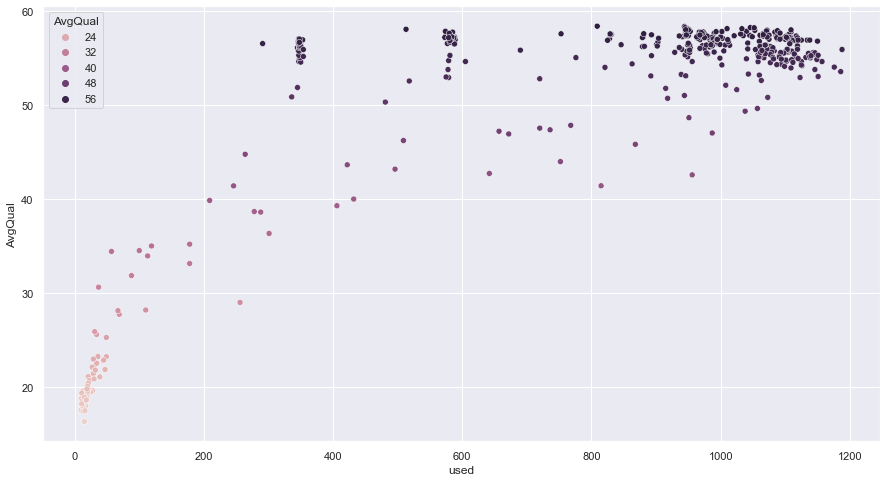

In [126]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=concating_all_plates_with_bad_reads, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

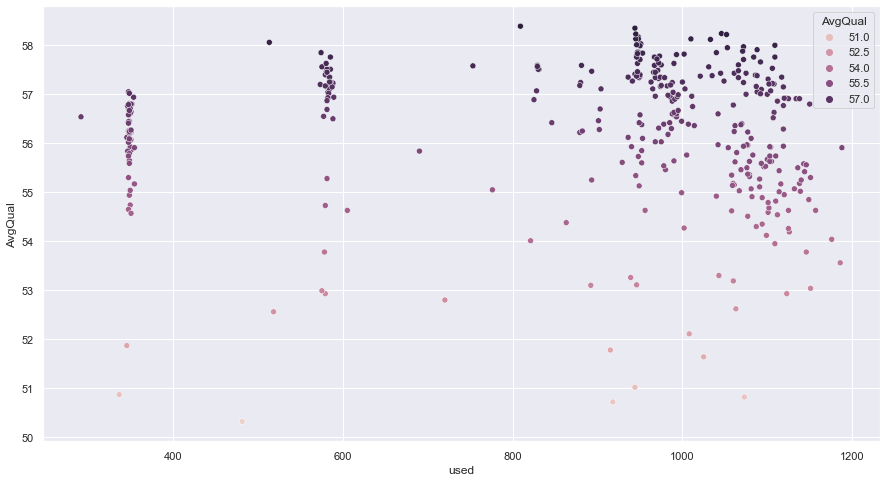

In [127]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=all_data_frames, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

### Infering promoter to sample relationship

### sanger reports

#### primers

In [128]:
from Bio import SeqIO

In [129]:
pad_pG8H_fw = SeqIO.read('../notebooks/pad_pG8H_fw.fasta', format = 'fasta')
pad_pCPR_fw = SeqIO.read('../notebooks/pad_pCPR_fw.fasta', format = 'fasta')
pad_pCPR_fw

primers_for_seq = [pad_pG8H_fw, pad_pCPR_fw]
primers_for_seq

[SeqRecord(seq=Seq('TGCCCATTCGATAAGGCA'), id='seq_mSRja9xj', name='seq_mSRja9xj', description='seq_mSRja9xj <unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GGCGTATGGACCTGTCT'), id='seq_G6JFHeOC', name='seq_G6JFHeOC', description='seq_G6JFHeOC <unknown description>', dbxrefs=[])]

### promoter

In [130]:
pCPR = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pCPR_sites.gb', format= 'gb'):
    pCPR.append(seq_record)
    
pG8H = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pG8H_sites.gb', format= 'gb'):
    pG8H.append(seq_record)
    
    
pG8H = [site for site in pG8H]

templates = pCPR+pG8H

In [131]:
pG8H

[SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTGCTGGCCATTTTTATTCAGGTTATTTGCGATTAGGTTGGGGTTTGTGTT...GCA'), id='seq_NFnLfXI8', name='pRPL15B', description='', dbxrefs=[])]

In [132]:
path = '../data/raw/10_Sanger_results/ab1'
files = os.listdir(path)

reads = []
for read in files:
    if read != '.ipynb_checkpoints': 
        reads.append(SeqIO.read('../data/raw/10_Sanger_results/ab1/'+read, 'abi'))


###  New sequencing module

getting the hits that have a proper quality:
    

In [133]:
reads[0]

SeqRecord(seq=Seq('NNNNNNNTNNNNNNNNNNNNNNNNNNNCGATAGGNNGNGCNCNNNNAAGGGNGG...NNA'), id='A-352518_C11', name='yp50_cpr_C11_pad_cpr_fw', description='', dbxrefs=[])

## Aligning promoters to reads - infer promoter alignment

In [134]:
from Bio import pairwise2 
alignments = pairwise2.align.globalxx("AATATTAGATAGATGATATATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG", 
                                      "AATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATGAATATTAGATAGATGATAGATATATATATTATATTATATTATAGATTGGGGCGGCGCTCGAATCATCAGTCATCAGCATG")

In [135]:
from Bio.pairwise2 import format_alignment
#print(format_alignment(*alignments[0].score))
alignments[0].score

69.0

In [136]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]
numbers_list = [5, 7,6, 8, 1, 2, 3, 4]

for i in range(len(templates)): 
    templates[i].description = numbers_list[i]
    
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='seq_KLllyItE', name='pCCW12', description=5, dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='seq_oMyQ3Qgm', name='pMLS1', description=7, dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='seq_Au475lsO', name='pTPI1', description=6, dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='seq_y4NqOW17', name='pURE2', description=8, dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description=1, dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description=2, dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', description=

In [137]:
# lets limit the alingment to only reads that are of proper quality
sample_names = all_data_frames['Sample-Name'].tolist()
print(len(sample_names))

good_samples = []
for i in range(len(reads)):
    for j in range(len(sample_names)): 
        if reads[i].name == sample_names[j]: 
            good_samples.append(reads[i])
            
len(good_samples)


357


355

In [138]:
def pairwise_alignment_of_templates(reads:list, templates:list) -> dict: 
    '''Infers relationship of templates to reads based on highest score from a pairwise alignment '''
    
    best_scores = []
    read_list = []
    template_list = []
    template_number_list = []

    for i in range(len(reads)):

        sample = reads[i].seq.replace("N", "")

        # Aling with templates
        if len(sample) > 25:
            score = 0.0
            for j in range(len(templates)): 
                template = templates[j].seq

                # Align # identical = 1, non-identical = -2 , gap = -2 , extending gap = -2
                #alignments = pairwise2.align.globalms(template, sample,2, -2, -5, -5)
                alignments = pairwise2.align.localxx(template, sample)

    
                # take the first and highest score 
                alignment_score = float(alignments[0].score)

                # Get the best alignment of them all 
                if alignment_score > score: 
                    score = alignment_score
                    temp_name = templates[j].name
                    temp_number = templates[j].description
                    read_name = reads[i].name

                
                

        #Saving the alignmets and their names
        #if read_name not in read_list: 
        best_scores.append(score)
        read_list.append(read_name)
        template_list.append(temp_name)
        template_number_list.append(temp_number)


    # Making a pandas. dataframe
    df_promoters = pd.DataFrame()
    df_promoters['Sample-Name']  = read_list
    df_promoters['inf_promoter_name'] = template_list
    df_promoters['align_score'] = best_scores
    df_promoters['inf_promoter'] = template_number_list
  
    
    return df_promoters

In [139]:
len(templates)

8

## Aligning with homemade functions

In [140]:
%%time

df_alignment = pairwise_alignment_of_templates(good_samples,templates)
#df_alignment = pairwise_alignment_of_templates(reads,templates )

df_alignment

CPU times: user 13min 21s, sys: 2 s, total: 13min 23s
Wall time: 13min 24s


,Sample-Name,inf_promoter_name,align_score,inf_promoter
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7
...,...,...,...,...
350,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8
351,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7
352,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
353,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2


In [141]:
col_list =  list(df_alignment["align_score"])
print(col_list)

[751.0, 973.0, 932.0, 964.0, 973.0, 509.0, 966.0, 892.0, 968.0, 970.0, 518.0, 951.0, 525.0, 951.0, 503.0, 967.0, 504.0, 968.0, 955.0, 966.0, 526.0, 972.0, 969.0, 970.0, 954.0, 969.0, 539.0, 959.0, 972.0, 972.0, 466.0, 949.0, 940.0, 954.0, 968.0, 957.0, 756.0, 518.0, 968.0, 933.0, 955.0, 544.0, 836.0, 955.0, 955.0, 968.0, 856.0, 500.0, 501.0, 974.0, 912.0, 793.0, 777.0, 785.0, 948.0, 969.0, 967.0, 950.0, 936.0, 955.0, 970.0, 948.0, 532.0, 969.0, 680.0, 531.0, 838.0, 971.0, 967.0, 955.0, 948.0, 973.0, 527.0, 962.0, 955.0, 954.0, 961.0, 969.0, 518.0, 751.0, 956.0, 951.0, 971.0, 969.0, 831.0, 970.0, 970.0, 977.0, 971.0, 970.0, 954.0, 959.0, 949.0, 964.0, 953.0, 850.0, 969.0, 971.0, 516.0, 972.0, 956.0, 969.0, 531.0, 964.0, 936.0, 793.0, 959.0, 955.0, 518.0, 950.0, 529.0, 953.0, 964.0, 926.0, 734.0, 949.0, 973.0, 968.0, 972.0, 972.0, 485.0, 955.0, 810.0, 974.0, 794.0, 951.0, 973.0, 512.0, 964.0, 748.0, 954.0, 955.0, 953.0, 544.0, 651.0, 911.0, 970.0, 970.0, 525.0, 529.0, 967.0, 951.0, 780.0

In [142]:
minvalue = df_alignment['align_score'].min()
minvalue

466.0

In [143]:
df_align_sort = df_alignment.sort_values(['Sample-Name'])
df_align_sort

,Sample-Name,inf_promoter_name,align_score,inf_promoter
146,yp49_cpr_A12_pad_cpr_fw,pMLS1,965.0,7
331,yp49_cpr_A1_pad_cpr_fw,pCCW12,833.0,5
234,yp49_cpr_A2_pad_cpr_fw,pURE2,972.0,8
224,yp49_cpr_A3_pad_cpr_fw,pURE2,973.0,8
352,yp49_cpr_A6_pad_cpr_fw,pTPI1,968.0,6
...,...,...,...,...
78,yp51_g8h_E2_pad_g8h_fw,pCYC1,518.0,1
37,yp51_g8h_E4_pad_g8h_fw,pCYC1,518.0,1
120,yp51_g8h_E7_pad_g8h_fw,pCYC1,485.0,1
115,yp51_g8h_E8_pad_g8h_fw,pRPL15B,949.0,4


In [144]:
df_alignment['position'] = ''
position = []
for index, row in df_alignment.iterrows():
    split = str(row['Sample-Name'].split("_")[1])
    if split == 'g8h': 
        position.append(1)
    if split == 'cpr': 
        position.append(2)

df_alignment['position'] = position
    

grouping the positions

In [145]:
grouped = df_alignment.groupby(df_alignment.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

g8h_df

,Sample-Name,inf_promoter_name,align_score,inf_promoter,position
1,yp49_g8h_D3_pad_g8h_fw,pPCK1,973.0,3,1
2,yp49_g8h_E6_pad_g8h_fw,pENO2,932.0,2,1
5,yp49_g8h_B7_pad_g8h_fw,pCYC1,509.0,1,1
6,yp49_g8h_C2_pad_g8h_fw,pPCK1,966.0,3,1
10,yp49_g8h_G12_pad_g8h_fw,pCYC1,518.0,1,1
...,...,...,...,...,...
347,yp51_g8h_A6_pad_g8h_fw,pCYC1,503.0,1,1
348,yp50_g8h_B7_pad_g8h_fw,pPCK1,961.0,3,1
349,yp50_g8h_C2_pad_g8h_fw,pRPL15B,955.0,4,1
353,yp50_g8h_D3_pad_g8h_fw,pENO2,960.0,2,1


In [146]:
cpr_df

,Sample-Name,inf_promoter_name,align_score,inf_promoter,position
0,yp51_cpr_C2_pad_cpr_fw,pCCW12,751.0,5,2
3,yp50_cpr_B12_pad_cpr_fw,pMLS1,964.0,7,2
4,yp51_cpr_E6_pad_cpr_fw,pMLS1,973.0,7,2
7,yp50_cpr_F7_pad_cpr_fw,pCCW12,892.0,5,2
8,yp50_cpr_G2_pad_cpr_fw,pURE2,968.0,8,2
...,...,...,...,...,...
345,yp49_cpr_F7_pad_cpr_fw,pURE2,973.0,8,2
346,yp49_cpr_G12_pad_cpr_fw,pMLS1,966.0,7,2
350,yp49_cpr_B10_pad_cpr_fw,pURE2,975.0,8,2
351,yp49_cpr_F11_pad_cpr_fw,pMLS1,968.0,7,2


In [164]:
# lets merge the quality dataframe
infered_promoters_df = pd.merge(all_data_frames, df_alignment, left_on=['Sample-Name'], right_on = ['Sample-Name'])
# Sort by two columns 
#sorted_df_promoters = infered_promoters_df.sort_values(['plate', 'well'],ascending = [True, True])
#sorted_df_promoters
#all_data_frames

In [165]:
infered_promoters_df = infered_promoters_df[["plate", "well", "inf_promoter", "position"]]
infered_promoters_df

,plate,well,inf_promoter,position
0,yp49,A03,8,2
1,yp49,B03,8,2
2,yp49,C03,6,2
3,yp49,F03,6,2
4,yp49,B04,5,2
...,...,...,...,...
283,yp51,D11,4,1
284,yp51,E11,3,1
285,yp51,A12,4,1
286,yp51,C12,3,1


In [166]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_promoter"]]
cpr_df = cpr_df[["plate", "well", "inf_promoter"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, left_on=['plate','well' ], right_on = ['plate','well'])
promoter_to_well

,plate,well,inf_promoter1,inf_promoter2
0,yp49,A03,3,8
1,yp49,B03,1,8
2,yp49,C03,3,6
3,yp49,F03,1,6
4,yp49,B04,1,5
...,...,...,...,...
96,yp51,D11,4,7
97,yp51,E11,3,7
98,yp51,A12,4,7
99,yp51,C12,3,7


In [167]:
print(len(g8h_df))
print(len(cpr_df))

169
119


Sanity check - did we get the correct promoters in each well? 


In [185]:
for index, row in df_alignment.iterrows():
    if row['position'] == 1 and row['inf_promoter'] > 4:
        print('SOMTHING WRONG WITH G8H', row['align_score'])
    if row['position'] == 2 and row['inf_promoter'] < 5:
        print('SOMTHING WRONG WITH CPR', row['align_score'])
        row['position']


SOMTHING WRONG WITH G8H 637.0


## Plate reports

## Combine data


In [193]:
sorted_df_lcms

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,295,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,428.763
1,279,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,H11,yp50,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,216.577
2,294,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.0,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,136.384
3,254,210519_TMET517_132.xms,96WP1056_H11,0.0,13.840299,0.0,41.660256,623.483435,96WP1056,H11,yp49,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,127.251
4,187,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,118.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,139,210330_TMET494_215.xms,96WP989_P2_E2,0.0,0.0,0.0,0.000000,589.4807702,96WP989,E02,yp49,MIA-HA-67,2.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
293,138,210330_TMET494_215.xms,96WP989_P2_E2,0.0,0.0,0.0,0.000000,589.4807702,96WP989,E02,yp49,MIA-HA-67,2.0,OpumG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
294,135,210519_TMET517_068.xms,96WP1056_D12,0.0,0.0,0.0,0.000000,619.353271,96WP1056,D12,yp49,MIA-HA-66,3.0,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
295,134,210330_TMET494_198.xms,96WP989_P2_D11,0.0,0.0,0.0,0.000000,647.3738235,96WP989,D11,yp49,MIA-HA-66,2.0,OpumG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000


In [194]:
promoter_genotype_relationship = pd.merge(promoter_to_well, sorted_df_lcms, on=['plate','well' ])
len(promoter_genotype_relationship)

137

In [195]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


g8h_genotype = []
cpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in promoter_genotype_relationship.iterrows():
    g8h_geno = str(row['genotype'].split(" ")[0])
    cpr_geno = str(row['genotype'].split(" ")[1])
    
    
    g8h_pos = g8h_list_of_index.index(str(row['genotype'].split(" ")[0]))+1
    cpr_pos = cpr_list_of_index.index(str(row['genotype'].split(" ")[1]))+1

    
    g8h_genotype.append(g8h_pos)
    cpr_genotype.append(cpr_pos)
    
promoter_genotype_relationship['G8H'] = g8h_genotype
promoter_genotype_relationship['CPR'] = cpr_genotype
    
len(promoter_genotype_relationship)

137

make new dataframe of promoters: 


plate


In [196]:
promoter_genotype_relationship = promoter_genotype_relationship[['plate', 'well', 'G8H','inf_promoter1', 'inf_promoter2', 'CPR',  'Amt_uM_Strictosidine', 'norm_strict_%']]
promoter_genotype_relationship

,plate,well,G8H,inf_promoter1,inf_promoter2,CPR,Amt_uM_Strictosidine,norm_strict_%
0,yp49,B03,1,1,8,5,2.971843,9.077
1,yp49,B03,1,1,8,5,2.971843,9.077
2,yp49,B03,1,1,8,5,2.971843,9.077
3,yp49,B03,1,1,8,5,0.000000,0.000
4,yp49,C03,1,3,6,9,8.598325,26.264
...,...,...,...,...,...,...,...,...
132,yp51,D11,8,4,7,6,0.000000,0.000
133,yp51,E11,8,3,7,10,0.000000,0.000
134,yp51,A12,7,4,7,4,0.000000,0.000
135,yp51,C12,8,3,7,2,0.000000,0.000


In [197]:
promoter_genotype_relationship.columns = ['plate', 'well', '0','1', '2', '3',  'Amt_uM_Strictosidine', 'Amt_norm']
promoter_genotype_relationship['Line name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']
promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line Name', '0','1', '2', '3', 'Amt_norm']]
promoter_genotype_relationship_for_ml.head

,Line name,well,0,1,2,3,Amt_norm
0,yp49_B03,B03,1,1,8,5,9.077
1,yp49_B03,B03,1,1,8,5,9.077
2,yp49_B03,B03,1,1,8,5,9.077
3,yp49_B03,B03,1,1,8,5,0.000
4,yp49_C03,C03,1,3,6,9,26.264
...,...,...,...,...,...,...,...
132,yp51_D11,D11,8,4,7,6,0.000
133,yp51_E11,E11,8,3,7,10,0.000
134,yp51_A12,A12,7,4,7,4,0.000
135,yp51_C12,C12,8,3,7,2,0.000


In [200]:
promoter_genotype_relationship_for_ml.head(50)

,Line name,well,0,1,2,3,Amt_norm
0,yp49_B03,B03,1,1,8,5,9.077
1,yp49_B03,B03,1,1,8,5,9.077
2,yp49_B03,B03,1,1,8,5,9.077
3,yp49_B03,B03,1,1,8,5,0.000
4,yp49_C03,C03,1,3,6,9,26.264
5,yp49_C03,C03,1,3,6,9,26.264
6,yp49_C03,C03,1,3,6,9,26.264
7,yp49_C03,C03,1,3,6,9,0.382
8,yp49_F03,F03,3,1,6,1,24.480
9,yp49_F03,F03,3,1,6,1,0.444


In [198]:
input_for_ml = pd.read_csv('../notebooks/input_for_ml.csv')
input_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
152,yp51_E07,8,1,8,9,6.795506
153,yp51_E08,8,4,5,9,0.668263
154,yp51_E09,8,1,5,9,4.225882
155,yp51_E11,8,3,7,10,0.000000
